<a href="https://colab.research.google.com/github/asiftandel96/DS-Use-Cases/blob/main/Hotel_Booking_Demand_Use_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
pip install pyforest

In [90]:
import pyforest

In [91]:
# Read the File from the local directory
df=pd.read_csv('/content/sample_data/hotel_bookings.csv')

<IPython.core.display.Javascript object>

In [92]:
#Checking the first five rows of the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [93]:
# Check the columns of the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Context


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!


Content


This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things


In [94]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [95]:
df.shape

(119390, 32)

In [96]:
df_num=df.select_dtypes(include=('int64','float64'))

In [97]:
len(df_num.columns)

20

In [98]:
df_categorical=df.select_dtypes(include=['O'])

In [99]:
len(df_categorical.columns)

12

In [100]:
# Checking the missing values in the dataset
df_num.isnull().mean()

is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
company                           0.943069
days_in_waiting_list              0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
dtype: float64

In [101]:
df_num.drop(['company'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df_categorical.isnull().sum()

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64

In [103]:
df_categorical.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
df_categorical.isnull().sum()

hotel                      0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64

In [105]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [106]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [107]:
df[['market_segment','customer_type']].value_counts().head()

market_segment  customer_type  
Online TA       Transient          51299
Offline TA/TO   Transient          14054
Direct          Transient          11336
Groups          Transient-Party    10633
                Transient           8427
dtype: int64

In [115]:
df[['country','market_segment','customer_type','arrival_date_month','deposit_type']].value_counts().head(20)

country  market_segment  customer_type    arrival_date_month  deposit_type
PRT      Online TA       Transient        August              No Deposit      1673
                                          July                No Deposit      1544
         Groups          Transient        May                 Non Refund      1125
ESP      Online TA       Transient        August              No Deposit      1062
FRA      Online TA       Transient        August              No Deposit       952
PRT      Offline TA/TO   Transient        June                Non Refund       938
         Groups          Transient        April               Non Refund       921
         Online TA       Transient        June                No Deposit       888
         Groups          Transient        September           Non Refund       878
         Direct          Transient        August              No Deposit       864
         Online TA       Transient        March               No Deposit       825
         Gro

In [125]:
df.groupby(['country','arrival_date_month','deposit_type'])['days_in_waiting_list'].agg('min').sort_values().head()

country  arrival_date_month  deposit_type
ABW      June                No Deposit      0
MYS      November            No Deposit      0
         May                 No Deposit      0
         March               No Deposit      0
         January             No Deposit      0
Name: days_in_waiting_list, dtype: int64

In [110]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [112]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [128]:
df.groupby(['arrival_date_month','deposit_type']).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72142,City Hotel,1,61,2017,July,29,22,1,1,2,0.0,0,BB,USA,Direct,Direct,0,0,0,D,D,0,Refundable,14.0,NaN,0,Transient,139.50,0,0,Canceled,2017-07-21
72532,City Hotel,1,13,2017,July,31,30,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,Refundable,9.0,NaN,0,Transient,162.67,0,2,Canceled,2017-07-27
72538,City Hotel,1,171,2017,July,31,30,2,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,Refundable,10.0,NaN,0,Transient,100.00,0,0,Canceled,2017-07-29
72620,City Hotel,1,132,2017,August,31,1,0,4,2,1.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,Refundable,8.0,NaN,0,Transient,209.70,0,0,Canceled,2017-07-28


In [130]:
df['adr'].dtypes

dtype('float64')

In [158]:
  # What is the best time of the year to book a hotel is:(January,February,November)
  #No Deposit UpFront
  #less waiting time.
  df.groupby(['arrival_date_month','deposit_type'])[['adr','days_in_waiting_list']].agg('mean').sort_values('deposit_type')

,,adr,days_in_waiting_list
arrival_date_month,deposit_type,,
April,No Deposit,102.018452,2.261153
September,No Deposit,107.452580,4.324482
August,No Deposit,144.707770,0.347786
October,No Deposit,89.214662,3.196621
December,No Deposit,81.530676,1.987805
November,No Deposit,72.497639,1.566711
February,No Deposit,73.975380,0.102238
January,No Deposit,69.901846,1.206591
May,No Deposit,108.785306,2.762910


In [159]:
#Or the optimal length of stay in order to get the best daily rate?
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [181]:
df.groupby('arrival_date_month')['lead_time','adr'].agg('mean').sort_values('lead_time')

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,lead_time,adr
arrival_date_month,,
January,45.310002,70.361241
February,47.859569,73.582276
March,70.119257,80.679646
December,73.561357,81.076776
November,76.580807,73.794962
April,94.822888,100.380790
May,117.646171,108.695516
August,121.137710,140.111523
October,122.994624,87.908879


<IPython.core.display.Javascript object>

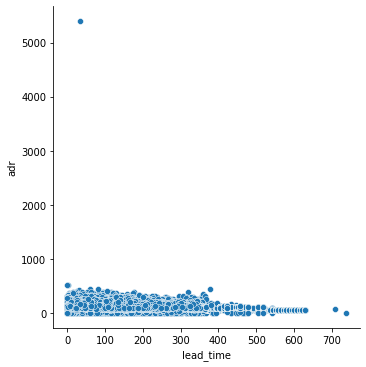

In [180]:
sns.relplot(x=df['lead_time'],y=df['adr'])

In [183]:
df.groupby(['arrival_date_day_of_month'])[''].agg('mean').sort_values().head()

arrival_date_day_of_month
27    88.628617
11    89.135038
10    89.350490
18    92.253623
2     95.599753
Name: lead_time, dtype: float64

In [187]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [194]:
df.groupby('reservation_status_date')['adr'].agg('mean').sort_values().head()

reservation_status_date
2014-11-18    0.00000
2015-01-18    0.00000
2015-03-23    3.00000
2015-02-26    8.00000
2015-01-02    9.63375
Name: adr, dtype: float64

In [204]:
df['reservation_status']

0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 119390, dtype: object

In [211]:
df[df['reservation_status']=='Check-Out'].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [213]:
df.groupby(['reservation_status','arrival_date_month'])['adr'].agg('mean').sort_values()

reservation_status  arrival_date_month
Check-Out           January                67.001050
                    November               70.505169
No-Show             February               71.396026
Check-Out           February               72.419429
No-Show             January                72.612267
                    December               74.960244
                    November               76.197436
Canceled            February               76.317365
Check-Out           March                  77.331574
Canceled            January                78.260710
Check-Out           December               78.920238
Canceled            November               81.222808
No-Show             March                  85.314590
Canceled            December               85.449747
Check-Out           October                86.830198
Canceled            March                  87.842669
                    October                89.576441
No-Show             October                94.748082
Check-O

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

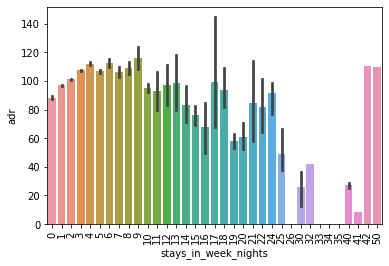

In [232]:
#'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month', 
#'stays_in_weekend_nights','stays_in_week_nights'

sns.barplot(x=df['stays_in_week_nights'],y=df['adr'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

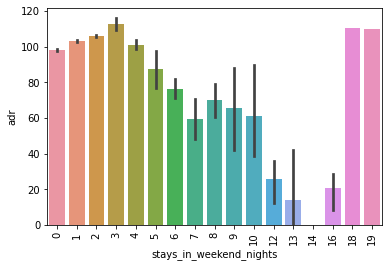

In [233]:
sns.barplot(x=df['stays_in_weekend_nights'],y=df['adr'])
plt.xticks(rotation=90)
plt.show()

In [239]:
df.groupby(['stays_in_week_nights','stays_in_weekend_nights'])['adr'].agg('mean').head(60)

stays_in_week_nights  stays_in_weekend_nights
0                     0                            0.000000
                      1                           95.468188
                      2                          100.950224
1                     0                           94.483820
                      1                           96.756630
                      2                          102.636616
2                     0                           97.693070
                      1                          105.677349
                      2                          103.915467
3                     0                          106.166288
                      1                          105.152237
                      2                          112.922050
4                     0                          106.307914
                      1                          114.190638
                      2                          119.405373
5                     0                          112.0

In [244]:
# Filter out the number of people who have stay_in_week_nights more than 40
df[df['stays_in_week_nights']>40]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,0.0,0,HB,NaN,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,110.50,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,0.0,0,HB,NaN,Direct,Direct,0,0,1,E,E,2,No Deposit,NaN,NaN,0,Transient,110.00,0,3,Check-Out,2016-09-12
101794,City Hotel,0,140,2016,September,39,22,16,41,0,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,K,12,No Deposit,9.0,NaN,0,Transient,8.34,0,2,Check-Out,2016-11-18


In [245]:
# Filter out the no of people who stayed in weekend nights more than 17 times
# Two records are similar in stay_in_week_nights and stay_in_weekend_nights Interesting Result!!!!!
df[df['stays_in_weekend_nights']>17]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,0.0,0,HB,NaN,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,110.5,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,0.0,0,HB,NaN,Direct,Direct,0,0,1,E,E,2,No Deposit,NaN,NaN,0,Transient,110.0,0,3,Check-Out,2016-09-12


In [246]:
#What if you wanted to predict whether or not a hotel was likely to 
#receive a disproportionately high number of special requests?
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [254]:
df['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [259]:
df.groupby(['hotel','arrival_date_month'])['total_of_special_requests'].agg('count').sort_values(ascending=False)

hotel         arrival_date_month
City Hotel    August                8983
              May                   8232
              July                  8088
              June                  7894
              October               7605
              April                 7480
              September             7400
              March                 6458
              February              4965
Resort Hotel  August                4894
              July                  4573
City Hotel    November              4357
              December              4132
              January               3736
Resort Hotel  April                 3609
              May                   3559
              October               3555
              March                 3336
              September             3108
              February              3103
              June                  3045
              December              2648
              November              2437
              January   